In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error ,mean_squared_error, r2_score

In [30]:
# Load the datasets
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

In [32]:
train_data.head(4)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793


In [31]:
train_data.shape

(300000, 11)

In [33]:
test_data.shape

(200000, 10)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [35]:
train_data.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [36]:
train_data.isnull().sum()


id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [37]:
print(train_data['Price'].max())
print(train_data['Price'].min())

150.0
15.0


In [38]:
train_data['Size'].value_counts()

Size
Medium    101906
Large      98643
Small      92856
Name: count, dtype: int64

In [39]:
# Separate features and target variable
X = train_data.drop(columns=["Price"])  # Features
y = train_data["Price"]  # Target variable

In [40]:
# Handle missing values
imputer = SimpleImputer(strategy="most_frequent")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

In [41]:
# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])
    test_data[col] = encoder.transform(test_data[col])

In [42]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_data)

In [16]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
print(f"X shape before scaling: {X.shape}")
print(f"X_train shape after scaling: {X_train.shape}")

X shape before scaling: (300000, 10)
X_train shape after scaling: (240000, 10)


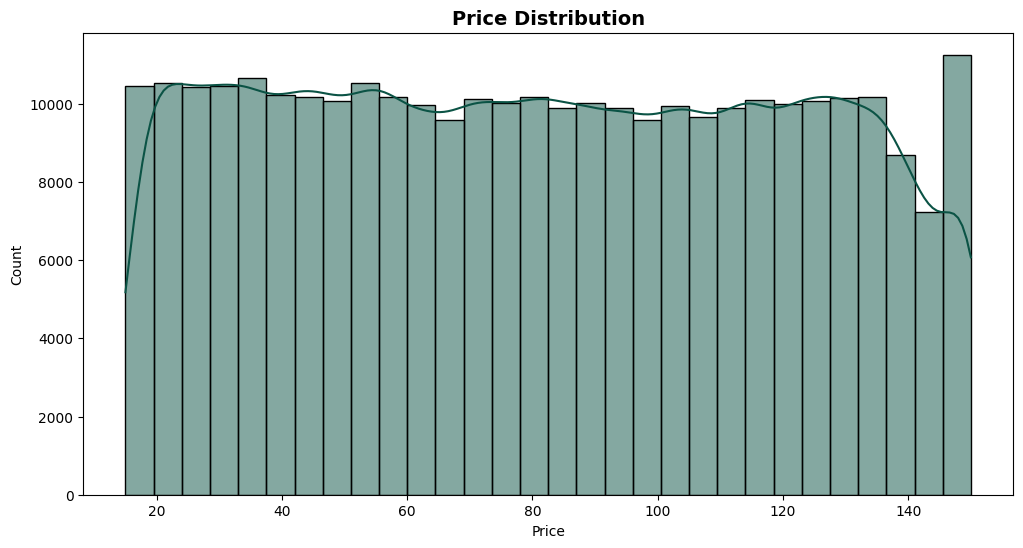

In [47]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(y, bins=30, kde=True , color="#0b5345")
plt.title("Price Distribution", fontsize=14, fontweight="bold", color="black")
plt.show()

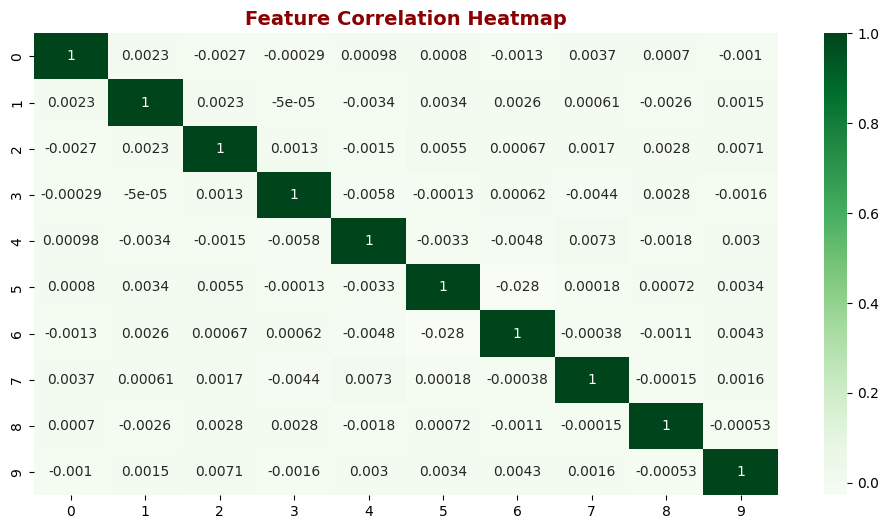

In [48]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(X_scaled).corr(), cmap="Greens", annot=True)  
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight="bold", color="darkred")
plt.show()

In [53]:
# Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [54]:
# Predict on validation data
dt_pred = dt_model.predict(X_val)

# Calculate regression evaluation metrics
dt_mae = mean_absolute_error(y_val, dt_pred)
dt_mse = mean_squared_error(y_val, dt_pred)
dt_r2 = r2_score(y_val, dt_pred)

In [55]:
# Print results
print(f"Mean Absolute Error: {dt_mae:.6f}")
print(f"Mean Squared Error: {dt_mse:.6f}")
print(f"R² Score: {dt_r2:.6f}")


Mean Absolute Error: 33.657291
Mean Squared Error: 1515.992457
R² Score: 0.000411


In [56]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
# Predict on validation data
rf_pred = rf_model.predict(X_val)

# Calculate regression evaluation metrics
rf_mae = mean_absolute_error(y_val, rf_pred)
rf_mse = mean_squared_error(y_val, rf_pred)
rf_r2 = r2_score(y_val, rf_pred)

In [58]:
# Print results
print(f"Mean Absolute Error: {rf_mae:.6f}")
print(f"Mean Squared Error: {rf_mse:.6f}")
print(f"R² Score: {rf_r2:.6f}")


Mean Absolute Error: 34.047009
Mean Squared Error: 1569.388454
R² Score: -0.034796


In [59]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [60]:
# Predict on validation data
gb_pred = gb_model.predict(X_val)

# Calculate regression evaluation metrics
gb_mae = mean_absolute_error(y_val, gb_pred)
gb_mse = mean_squared_error(y_val, gb_pred)
gb_r2 = r2_score(y_val, gb_pred)

In [61]:
# Print results
print(f"Mean Absolute Error: {gb_mae:.6f}")
print(f"Mean Squared Error: {gb_mse:.6f}")
print(f"R² Score: {gb_r2:.6f}")

Mean Absolute Error: 33.647850
Mean Squared Error: 1514.870190
R² Score: 0.001151


In [62]:
# Clustering Analysis
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
X["Cluster"] = kmeans.labels_

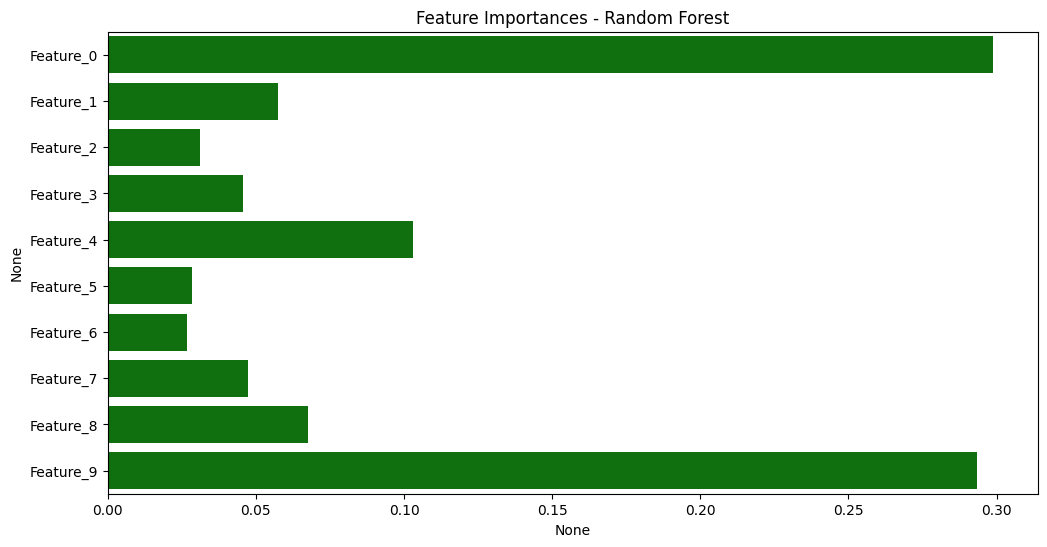

In [63]:
# Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=[f"Feature_{i}" for i in range(X_train.shape[1])])
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=importances.index, color='green')
plt.title("Feature Importances - Random Forest")
plt.show()

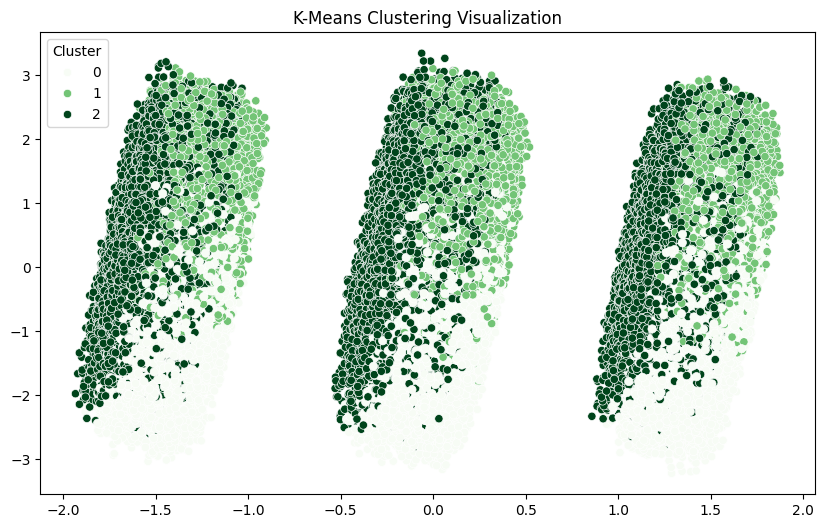

In [64]:
# PCA for Clustering Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X["Cluster"], palette="Greens")
plt.title("K-Means Clustering Visualization")
plt.show()

In [65]:
# Save submission file
test_predictions = rf_model.predict(test_scaled)
submission = pd.DataFrame({"id": range(300000, 300000 + len(test_predictions)), "Predicted Price": test_predictions})
submission.to_csv("submission.csv", index=False)

In [66]:
print("Mean Absolute Errors:")
print(f"Decision Tree: {dt_mae}")
print(f"Random Forest: {rf_mae}")
print(f"Gradient Boosting: {gb_mae}")
print("Submission file saved!")

Mean Absolute Errors:
Decision Tree: 33.657290767626016
Random Forest: 34.04700935366167
Gradient Boosting: 33.64784998645233
Submission file saved!


In [34]:
import joblib

# Save the trained model and scaler
joblib.dump(gb_model, "gradient_boosting_model.pkl")  # Save your trained model
joblib.dump(scaler, "scaler.pkl")  # Save your data scaler

['scaler.pkl']